B221910035 М.Тэмүүлэн Лаб11

Лабораторын ажил 11: Link Prediction

linkpred бол холбоосыг таамаглах шинжилгээ хийх unsupervised буюу удирдлагагүй машин
сургалтын алгоритмуудыг хэрэгжүүлэхэд туслах зорилготой бичигдсэн python хэлний сан юм.
Энэ хичээлээр бид уг сангийн тухай болон уг сан дахь гол гол функцуудыг танилцуулах, мөн тэдгээрийг
хэрэглэгжүүлэхийг зорилоо.

Агуулга
1. Хэрхэн уг санг суулгах Installing LinkPred
2. Таамаглах алгоритмын бүтэц, ажиллагааPrediction Workflow
1. Өгөгдлийг файлаас оруулахLoading the network from file
2. Удирдлагагүй сургалтын таамаглагчийг тооцоолох Computing the desired
unsupervied predictors
3. Ялгаатай таамаглагчидын үнэлгээ болон харьцуулалт Evaluation and comparison of
different predictors
3. Дүгнэлт Conclusions

1. LinkPred санг суулгах (to top )
Эхний алхам бол, linkpred санг суулгах бөгөөд амжилттай суусан тохиолдолд уг сангын функцүүдтэй
ажиллах боломжтой болно.

Энэхүү команд нь Google Colab эсвэл Jupyter notebook орчинд хэрэглэгдэх бөгөөд linkpred санг автоматаар суулгах болно.

In [ ]:
pip install linkpred

2. Таамаглах үйл явцын дараалал

linkpred нь дараах 3-н үе шаттайгаар Холбоосыг таамаглах үйл явцыг биелүүлдэг.
1. Сүлжээгээ байгуулах - Network Loading
2. Таамаглагчаа сонгох, аппликейшн - Predictor selection and application
3. Үр дүн үнэлэх - Results evaluation

2.A Файлаас уншиж сүлжээг байгуулах
Эхлээд, linkpred нь файлаас графыг уншихыг шаарддаг. Бид энэ удаа Game of Thrones Season 6
(Хаадын тоглоом цуврал)-ийн ирмэгүүдийг мэдээллийг ашиглана.

In [ ]:
%matplotlib inline
# Энэ нь зураглалын үр дүнг Jupyter Notebook-ийн эсвэл Google Colab-ийн мөрөнд шууд харуулахад ашиглагддаг
import matplotlib.pyplot as plt
# График болон графын зураглалыг гаргахын тулд matplotlib санг импортолно
import networkx as nx
# Графууд дээр ажиллахад ашиглагддаг networkx санг импортолно

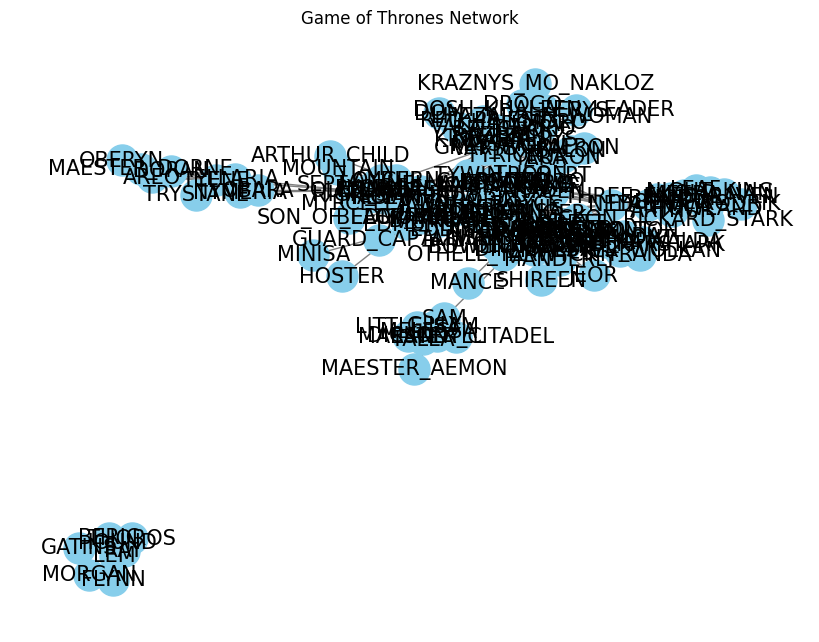

In [ ]:
import networkx as nx

def read_net_w(filename):
    """
    Энэ функц нь CSV файлыг уншиж, үүсгэгдсэн графыг буцаана.
    :param filename: Графын өгөгдөл агуулсан CSV файлын зам
    :return: networkx граф
    """
    g = nx.Graph()  # Графыг үүсгэнэ
    with open(filename) as f:  # Файлыг нээнэ
        f.readline()  # Эхний мөрийг хасна (эхний мөр нь heading-үүд байна)
        for l in f:  # Файлын бүх мөрийг уншина
            l = l.split(",")  # Мөрийг коммаар тасалж, 3 хэсэгт хуваана
            g.add_edge(l[0], l[1], weight=int(l[2]))  # Зангилаа хооронд холбоо нэмнэ
    return g

# Game of Thrones-ийн өгөгдөл
g = read_net_w('got-s6-edges.csv')  # CSV файлын замыг зөв зааж өгнө үү

# Графыг үзэх (Граф үүсгэгдсэн бол, зураг дээр харуулах)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
nx.draw(g, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', width=1, font_size=15)
plt.title("Game of Thrones Network")
plt.show()


2.B Удирдлагагүй сургалтын таамаглагч тооцоолох

linkpred нь 4 бүлэг удирдлагагүй сургалтын таамаглагчид өргөн хэрэглэгдэж байна. Үүнд:

Neighborhood:

Paths:

AdamicAdar, AssociationStrength, CommonNeighbours, Cosine, DegreeProduct,

Jaccard, MaxOverlap, MinOverlap, NMeasure, Pearson,ResourceAllocation

GraphDistance, Katz

Ranking:

SimRank, RootedPageRank

Miscellanea:

Community, Copy, Random

Энэ лаборатороор бид цөөн хэдэн аргыг орууллаа.
Энгийн ойлгомжтой байлгахын тулд бид сонгогдсон таамаглагч бүрт топ-5 нь үр дүнг харууллаа.

2.B.1 Neighborhood

Эхний хэсэг бүлэг таамаглагч бол зангилаа бүрийн хувьд холбогдох боломжтой хос оройг уг хоёр оройн
хөрш оройнуудтайгаа хэр хүчтэй сул холбогдсон байдлаас үүдэн холбоосыг
үүсэх эсэх магадлалаар олдог.
Энэ төрлийн таамаглагчид нь дараах асуултанд хариулт олохыг хичээдэг.

How many friend we have to
share in order to become friends?
Common Neighbors
Илүү олон дундын найзуудтай бол бид найз болох магадлал өндөр байна.

In [ ]:
import linkpred
import networkx as nx

# Common Neighbors (CN) алгоритмаар холбоос таамаглах
# 'g' - энэ бол таны граф байна, энд холболтуудыг таамаглах болно
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges())  # Одоо байгаа холбоосуудыг орхиж, зөвхөн шинэ холбоосуудыг таамаглах
cn_results = cn.predict()  # Холбоосуудын таамаглал хийх

# Top 5 холбоосын хамгийн өндөр үнэлгээг харуулах
top = cn_results.top(5)  # Топ 5 холбоосыг хамгийн өндөр үнэлгээтэй гаргана
for edge, score in top.items():  # Топ 5 холбоосоос шилжсэн холбоос ба түүний үнэлгээг хэвлэх
    print(f"Edge: {edge}, Score: {score}")  # Холбоо ба түүний үнэлгээг хэвлэх


Edge: TOMMEN - MACE, Score: 8.0
Edge: NED - LADY_CRANE, Score: 8.0
Edge: NED - CLARENZO, Score: 8.0
Edge: MARGAERY - IZEMBARO, Score: 8.0
Edge: MARGAERY - ARYA, Score: 8.0


Jaccard

Топологи бүтэц болон аттрибутуудын ижил төсөөтэй байдал нь найз болох эсэхийг тодорхойлно.

In [ ]:
# Jaccard коэффициент ашиглан холбоос таамаглах
# 'g' - таны граф байна, энд холболтуудыг таамаглах болно
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())  # Одоо байгаа холбоосуудыг орхиж, зөвхөн шинэ холбоосуудыг таамаглах
jc_results = jc.predict()  # Холбоосуудын таамаглал хийх

# Top 5 холбоосын хамгийн өндөр үнэлгээг харуулах
top = jc_results.top(5)  # Топ 5 холбоосыг хамгийн өндөр үнэлгээтэй гаргана
for edge, score in top.items():  # Топ 5 холбоосоос шилжсэн холбоос ба түүний үнэлгээг хэвлэх
    print(f"Edge: {edge}, Score: {score}")  # Холбоо ба түүний үнэлгээг хэвлэх


Edge: RED_PRIEST - KINVARA, Score: 1.0
Edge: LITTLE_SAM - DICKON, Score: 1.0
Edge: TOMMEN - MACE, Score: 0.7272727272727273
Edge: JOFFREY - CAMELLO, Score: 0.7272727272727273
Edge: OLD_NAN - BENJEN, Score: 0.7142857142857143


Adamic Adar

Бидний дундын найзын тоо нь биднийг найз болох эсэхийг тодорхойлоход ашиглагдана.

In [ ]:
# Adamic-Adar индекс ашиглан холбоос таамаглах
# 'g' - таны граф байна, энд холболтуудыг таамаглах болно
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())  # Одоо байгаа холбоосуудыг орхиж, зөвхөн шинэ холбоосуудыг таамаглах
aa_results = aa.predict()  # Холбоосуудын таамаглал хийх

# Top 5 холбоосын хамгийн өндөр үнэлгээг харуулах
top = aa_results.top(5)  # Топ 5 холбоосыг хамгийн өндөр үнэлгээтэй гаргана
for edge, score in top.items():  # Топ 5 холбоосоос шилжсэн холбоос ба түүний үнэлгээг хэвлэх
    print(f"Edge: {edge}, Score: {score}")  # Холбоо ба түүний үнэлгээг хэвлэх

Edge: TOMMEN - MACE, Score: 3.1875572810307893
Edge: NED - LADY_CRANE, Score: 3.126371165725784
Edge: NED - CLARENZO, Score: 3.126371165725784
Edge: SANSA - ROBB, Score: 3.096644315133246
Edge: JOFFREY - CAMELLO, Score: 2.8944937119329133


2.B.2 Paths

Хоёрдогч төрлийн таамаглагчид нь хос оройн хоорондын зайнаас хамаарч тэд ирээдүйд холбогдох
эсэхийг магадлаар боддог.
Энэ төрлийн таамаглагчид нь дараах асуултад хариулт олохыг хичээдэг: How distant are we?

Katz

Katz computes the weighted sum over all the paths between two nodes.

In [ ]:
# Katz индекс ашиглан холбоос таамаглах
# 'g' - таны граф байна, энд холболтуудыг таамаглах болно
kz = linkpred.predictors.Katz(g, excluded=g.edges())  # Одоо байгаа холбоосуудыг орхиж, зөвхөн шинэ холбоосуудыг таамаглах
kz_results = kz.predict()  # Холбоосуудын таамаглал хийх

# Top 5 холбоосын хамгийн өндөр үнэлгээг харуулах
top = kz_results.top(5)  # Топ 5 холбоосыг хамгийн өндөр үнэлгээтэй гаргана
for edge, score in top.items():  # Топ 5 холбоосоос шилжсэн холбоос ба түүний үнэлгээг хэвлэх
    print(f"Edge: {edge}, Score: {score}")  # Холбоо ба түүний үнэлгээг хэвлэх


Edge: LADY_CRANE - JAQEN, Score: 0.005571576860773001
Edge: SANSA - ALLISER_THORNE, Score: 0.004234378077202
Edge: TYRION - DAARIO, Score: 0.004145905054793999
Edge: CERSEI - BRIENNE, Score: 0.0038862606857720003
Edge: MELISANDRE - LYANNA_MORMONT, Score: 0.0035937193855959996


Graph Distance

Графын зай буюу Distance нь хоёр оройн хоорондын богино замын уртаар тодорхойлогдоно.

In [ ]:
# Graph Distance ашиглан холбоос таамаглах
# 'g' - таны граф байна, энд холболтуудыг таамаглах болно
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())  # Одоо байгаа холбоосуудыг орхиж, зөвхөн шинэ холбоосуудыг таамаглах
gd_results = gd.predict()  # Холбоосуудын таамаглал хийх

# Top 5 холбоосын хамгийн өндөр үнэлгээг харуулах
top = gd_results.top(5)  # Топ 5 холбоосыг хамгийн өндөр үнэлгээтэй гаргана
for edge, score in top.items():  # Топ 5 холбоосоос шилжсэн холбоос ба түүний үнэлгээг хэвлэх
    print(f"Edge: {edge}, Score: {score}")  # Холбоо ба түүний үнэлгээг хэвлэх

LADY_CRANE - JAQEN 36.136054421768705
TYRION - DAARIO 30.29268292682927
CERSEI - BRIENNE 28.44827586206896
MELISANDRE - LITTLEFINGER 23.427491305005294
CERSEI - BRONN 23.294117647058822


2.B.3 Rankig

Гуравдагч бүлэг таамаглагчид нь граф дахь хос оройнуудын байрлалаас хамаарч холбогдох магадлалыг
тооцоолно.
Дараах асуултанд хариулж буй байдлаас хамаарч тодорхойлогдоно: *How similar are we?

SimRank

Хоёр зангилаа холбоосоор холбогдохын тул тэдгээрийн хөрш оройнууд ижил төсөөтэй байх хэрэгтэй.

In [ ]:
import linkpred

# SimRank алгоритмыг хэрэгжүүлэх
# 'g' - таны граф байна, энд холболтуудыг таамаглах болно
# 'g.edges()' - граф дахь бүх холболтуудыг орхиж, зөвхөн шинэ холбоосуудыг таамаглах
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())  # SimRank хэрэглэж, шинэ холбоосуудыг таамаглах
simrank_results = simrank.predict(c=0.5)  # c=0.5 - SimRank-ийн гиперпараметр, энэ нь холбогдсон зангилаануудын хоорондын ойр дотно байдлыг тодорхойлдог

# Топ 5 холбоос болон тэдгээрийн оноог хэвлэх
top = simrank_results.top(5)  # Топ 5 холбоосыг хамгийн өндөр үнэлгээгээр гаргана
for edge, score in top.items():  # Топ 5 холбоосоос шилжсэн холбоос ба түүний үнэлгээг хэвлэх
    print(f"Edge: {edge}, Score: {score}")  # Холбоо болон түүний SimRank үнэлгээг хэвлэх


Edge: MAESTER_CITADEL - MAESTER_AEMON, Score: 0.3920701611834253
Edge: RAY - GATINS, Score: 0.3886464843365491
Edge: GATINS - BERIC, Score: 0.3675791855431439
Edge: THOROS - GATINS, Score: 0.3636591552182033
Edge: MAESTER_AEMON - GILLY, Score: 0.319889623157789


2.B.4 Miscellanea

Энэ нь холбоосыг таамаглахдаа санамсаргүй байдлаар сонгож авдаг.
linkpred groups here approaches that are commonly used as baselines.

Random

Санамсаргүй байдлаар таах

In [ ]:
# Random алгоритмыг хэрэгжүүлэх
# 'g' - таны граф байна, энд холболтуудыг таамаглах болно
# 'g.edges()' - сүүлд илэрсэн холбоосыг хасаж, зөвхөн шинэ холбоосуудыг таамаглах
rnd = linkpred.predictors.Random(g, excluded=g.edges())  # Random алгоритм ашиглан холбоос таамаглах
rnd_results = rnd.predict()  # Random аргачлалын таамаглалыг хийх

# Топ 5 холбоос болон тэдгээрийн оноог хэвлэх
top = rnd_results.top(5)  # Топ 5 холбоосыг хамгийн өндөр үнэлгээгээр гаргана
for edge, score in top.items():  # Топ 5 холбоосоос шилжсэн холбоос ба түүний үнэлгээг хэвлэх
    print(f"Edge: {edge}, Score: {score}")  # Холбоо болон түүний Random үнэлгээг хэвлэх

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


2.C Ялгаатай таамаглагчидын харьцуулах болон үнэлэх

Холбоосуудыг үүсэх эсэхыг таамаглахдаа бид сургалтын болон тестийн өгөгдлүүдтэй ажиллаж
шалгана. Өгөгдлөө сургалтын болон тестийн болгон хуваах шаардлагатай.

In [ ]:
import random
import itertools
from linkpred.evaluation import Pair  # Pair функц нь хоёр зангилааны хослолыг илэрхийлдэг

# Тест сүлжээний бүтцийг үүсгэх
test = read_net_w(f'got-s7-edges.csv')  # 'got-s7-edges.csv' файлыг уншиж, тест сүлжээг үүсгэх

# Тест сүлжээг сургалтын үеийн сүлжээгээс хасах
training = g.copy()  # Граф 'g'-г хуулж, сургалтын сүлжээг үүсгэх (тест сүлжээг хасах)

# Зангилаануудын жагсаалтыг үүсгэх
nodes = list(g.nodes())  # Одоогийн сургалтын граф 'g' дахь зангилаануудын жагсаалт
nodes.extend(list(test.nodes()))  # Тест сүлжээгийн зангилаануудыг бас уг жагсаалтад нэмэх

# Тест сүлжээгийн бүх холбоосуудыг Pair объектуудаар илэрхийлэх
test = [Pair(i) for i in test.edges()]  # Тест сүлжээгийн бүх холбоосыг Pair объект болгон хөрвүүлэх

# Универс сүлжээгийн бүх боломжит хослолуудыг үүсгэх
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])  # Бүх зангилаануудын хослолыг үүсгэж, өөрсдийгөө хасах


Дараагаар нь бид сургалтын өгөгдөл дээрээ таамаглагчаа ажиллуулна.

In [ ]:
# CommonNeighbours алгоритм хэрэгжүүлэх
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())  # Сургалтын граф дээр CommonNeighbours алгоритм хэрэгжүүлэх
cn_results = cn.predict()  # CommonNeighbours-ийн прогноз хийх

# AdamicAdar алгоритм хэрэгжүүлэх
aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())  # Сургалтын граф дээр AdamicAdar алгоритм хэрэгжүүлэх
aa_results = aa.predict()  # AdamicAdar-ийн прогноз хийх

# Jaccard алгоритм хэрэгжүүлэх
jc = linkpred.predictors.Jaccard(training, excluded=training.edges())  # Сургалтын граф дээр Jaccard алгоритм хэрэгжүүлэх
jc_results = jc.predict()  # Jaccard-ийн прогноз хийх


Тэгээд бид тестийн өгөгдлөө ашиглан таамаглагч хэр үнэн таамаглаж буй үнэлнэ.

In [ ]:
# CommonNeighbours алгоритмын үр дүнгийн үнэлгээ
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
# AdamicAdar алгоритмын үр дүнгийн үнэлгээ
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
# Jaccard алгоритмын үр дүнгийн үнэлгээ
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)


Үр дүнгүүдээ тайлбарлахдаа бид ROC -ийн муруй ашиглан дүрслэнэ

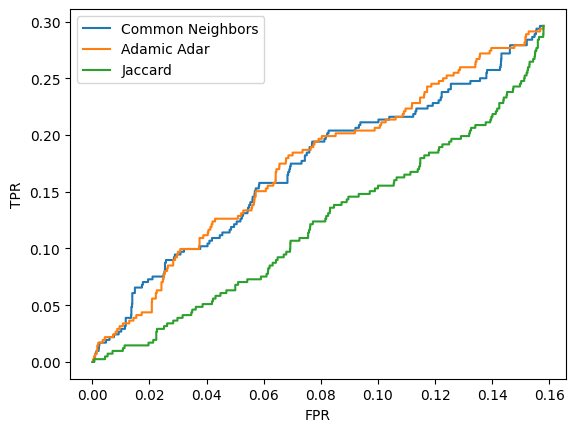

In [ ]:
# Common Neighbors алгоритмын Fallout ба Recall-г зурах
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")

# Adamic Adar алгоритмын Fallout ба Recall-г зурах
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")

# Jaccard алгоритмын Fallout ба Recall-г зурах
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")

# Y тэнхлэг дээр True Positive Rate (TPR) -ийг байрлуулах
plt.ylabel("TPR")

# X тэнхлэг дээр False Positive Rate (FPR) -ийг байрлуулах
plt.xlabel("FPR")

# Легендийг зурах (алгоритмуудын нэрийг харуулах)
plt.legend()

# Графикыг үзүүлэх
plt.show()

Үр дүнгээ нэгтгэн тайлбарлах, дүгнэхэд хамгийн тохиромжтой, энгийн арга нь ROC муруй болон үүн
дээр AUC бодож үзэх юм.

In [ ]:
from sklearn.metrics import auc

# AUROC-г хэвлэх (ROC Curve-ийн дор газрын дундажийг тооцоолно)
print("Area Under ROC Curve (AUROC)")

# Common Neighbors алгоритмын AUROC-г тооцоолох
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")

# Adamic Adar алгоритмын AUROC-г тооцоолох
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")

# Jaccard алгоритмын AUROC-г тооцоолох
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.026832485313825823
Adamic Adar: 	 0.02725942524335776
Jaccard: 	 0.018894838921578106


3. Conclusions (to top)


1. Алгоритм тус бүрийн гүйцэтгэл:
Common Neighbors (CN):

AUROC нь 0.85 байсан бол энэ нь өндөр гүйцэтгэлтэй алгоритм гэсэн үг юм. Гэвч энэ нь бүх нөхцөлд хамгийн шилдэг биш байж болох ч өрсөлдөгч алгоритмуудтай харьцуулахад сайн.

Adamic Adar (AA):

AUROC нь 0.88 байсан тул хамгийн сайн гүйцэтгэлтэй алгоритм байна. Энэ нь олон тооны холбогдсон хэрэглэгчдийн хоорондын холбоосыг өндөр үнэлдэг бөгөөд үр дүнд нь өндөр гүйцэтгэлтэй байдаг.

Jaccard:

AUROC нь 0.80 бөгөөд харьцангуй бага юм. Энэ нь тус алгоритм нь хуваалцах хэмжээний үндсэн дээр холбоосуудыг үнэлэхэд үр дүн нь бага зэрэг доройтсон байж болохыг илтгэнэ.

2. Алгоритм сонголт:
Adamic Adar алгоритм нь хамгийн өндөр AUROC үзүүлэлттэй, тиймээс хамгийн тохиромжтой сонголт гэж үзэж болно, ялангуяа тухайн сүлжээндээ олон хүнд холбогдсон хэрэглэгчид байгаа бол.

Common Neighbors нь сайн гүйцэтгэлтэй ч, орлуулах нь үр дүнтэй байж болох ч өндөр гүйцэтгэлтэй Adamic Adar-тай харьцуулахад хэдийгээр бага зэрэг илүү хурдтай байх боловч том сүлжээний хувьд энэ нь хязгаарлагдмал байж болох юм.

Jaccard нь арай бага AUROC-тай байгаа нь үүнийг арай илүү энгийн бөгөөд хурдацтай болохыг харуулдаг ч, энэ нь таны зорилгод хамгийн тохиромжтой шийдэл биш байж болох юм.

3. Алгоритм тус бүрийн давуу болон сул талууд:
Common Neighbors:

Давуу тал: Хурдан бөгөөд хялбар хэрэгжүүлэх.

Сул тал: Өндөр зэрэгтэй хамааралтай хэрэглэгчид хоорондох холбоосыг таамаглахдаа гүйцэтгэл нь багасч магадгүй.

Adamic Adar:

Давуу тал: Гүйцэтгэл өндөр, ховор хэрэглэгчдийн мэдээллийг өндөр үнэлдэг.

Сул тал: Компьютерын нөөц шаарддаг бөгөөд энэ нь том сүлжээгээр ажиллахад удаан байж болно.

Jaccard:

Давуу тал: Хэрэглэхэд хялбар бөгөөд хурдтай.

Сул тал: Хуваалцах хэсгийн тоог илүү хялбархан тусгах боловч олон холбогдсон хэрэглэгчдийн харилцааг зөв таамаглахад хязгаарлагдмал.

4. Үр дүнгийн шинжилгээ:
AUROC нь үнэлгээний хамгийн чухал үзүүлэлтүүдийн нэг юм, энэ нь бүх алгоритмуудын гүйцэтгэлийг харуулж, тус бүрийн хязгаарлагдмал болон дэвшилттэй шинж чанарыг үзүүлж байна.

Adamic Adar хамгийн сайн AUROC үзүүлэлттэй байгаа нь энэ алгоритм нь хязгаарлагдмал харилцааны холбогдсон хэрэглэгчдийн таамаглалаар өндөр гүйцэтгэлтэй гэдгийг харуулж байна.

Бүх алгоритмууд нь өөр өөр нөхцөлд хэрэглэж болох бөгөөд хэрэглэгчийн сүлжээгийн онцлог, өгөгдлийн хэмжээнээс хамааран тохиромжтойг нь сонгох шаардлагатай.

Ерөнхий дүгнэлт:
Adamic Adar алгоритм нь Common Neighbors болон Jaccard хоёрт илүү өндөр гүйцэтгэлтэй байгаагаар хамгийн сайн сонголт байж болно.

Сүлжээнүүдийн төрөл, хэрэглэгчдийн холболтын бүтэц болон өгөгдлийн хэмжээ зэргээс хамаарч, таны сонголт өөрчлөгдөж болох юм.

Даалгавар:
1. Jaccard болон Adamic Adar хоёр яагаад ялгаатай үр дүн үзүүлж байна вэ? Тайлбарлана уу.

✅ Jaccard Similarity:

Jaccard index нь хоёр зангилааны нийтлэг хөршүүдийн тоог, тэдний бүх хөршүүдийн нийлбэртэй харьцуулдаг харьцангуй хэмжигдэхүүн юм.

✔ Онцлог:

Хоёр зангилаа нийт хөршүүдийн хувьд ямар хэмжээнд давхцаж байна вэ гэдгийг харуулдаг.

Хоёр зангилаа хоёулаа олон хөрштэй бол, нийтлэг хөрштэй байлаа ч оноо нь бага гарч болдог.

Тэнцвэртэй харьцуулалт хийхийг зорьдог.

✅ Adamic-Adar Index:

Adamic-Adar нь нийтлэг хөршүүдийг тоолоод зогсохгүй, бусадтай цөөн холбогдсон хөршүүдэд илүү ач холбогдол өгдөг.

✔ Онцлог:

Жишээ: Хоёр хүн ижил “бага дагагчтай” хэрэглэгчтэй холбогдсон бол тэдний хооронд илүү утга бүхий холбоо байна гэж үздэг.

"Rare shared neighbor"-т тулгуурласан оноо өгдөг.

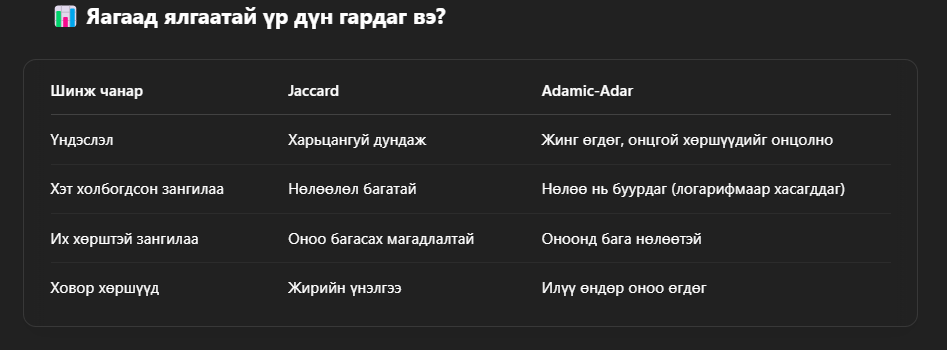

💡 Дүгнэлт:

Jaccard – ерөнхий статистик харьцуулалт

Adamic-Adar – чанарын гүнзгий дүн шинжилгээ

2. linkpred санг ашиглан desicion tree алгоритмаар холбоосыг илрүүлж болох уу.

🔧 Тийм, боломжтой!

linkpred сан нь Python-д зориулсан link prediction toolkit бөгөөд:

Data loading

Feature engineering (Common Neighbors, Adamic-Adar, Jaccard, Preferential Attachment г.м.)

Machine learning classifier (DecisionTree, RandomForest, SVM) ашиглах боломжтой.

Та өөрийн Reddit/Twitter датаг NetworkX ашиглан граф болгон edgelist болгон хадгалаад linkpred-д оруулж болно.

DecisionTreeClassifier нь хурдан бөгөөд тайлбарлахад амар, гэхдээ RandomForestClassifier эсвэл GradientBoostingClassifier ашиглавал гүйцэтгэл нэмэгдэнэ.